<a href="https://colab.research.google.com/github/bachtiar09/InvestigateHotelBusinessusingDataVisualization/blob/main/Investigate_Hotel_Business_using_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# l# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

# load dataset
df = pd.read_csv("hotel_bookings_data.csv")
pd.set_option('display.max_columns',None)
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
92101,City Hotel,0,7,2018,August,27,27,1,3,1,0.0,0,Breakfast,Kota Batu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,28.0,NaN,0,Personal,68.0,0,0,Check-Out
23408,Resort Hotel,0,42,2018,June,17,23,1,1,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,250.0,NaN,0,Personal,78.0,1,0,Check-Out
41941,City Hotel,0,15,2017,October,35,27,0,2,2,0.0,0,Breakfast,Kota Batu,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Contract,90.0,0,1,Check-Out
85598,City Hotel,0,5,2018,May,12,14,1,3,2,0.0,0,Breakfast,Kota Yogyakarta,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,109.0,0,1,Check-Out
16879,Resort Hotel,0,222,2017,November,38,14,1,1,2,0.0,0,Dinner,Kota Batu,Groups,TA/TO,0,0,0,0,No Deposit,68.0,NaN,0,Family,80.0,0,0,Check-Out


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

## mising value

In [ ]:
# presentase mising
mising = df.isnull().sum()*100/len(df)
mising = (round(mising,3))
percent = pd.DataFrame({'nama': df.columns,
                        'jumlah' : df.isnull().sum(),
                        'persen(%)' : mising
                        })
percent.reset_index(drop=True).sort_values(by=['jumlah'], ascending=False).head(4)


,nama,jumlah,persen(%)
22,company,112593,94.307
21,agent,16340,13.686
13,city,488,0.409
10,children,4,0.003


In [ ]:
# membuang kolom 
df.dropna(subset=['agent','city','children'])
df['company'] = df['company'].fillna(0)

## taks 2

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,0.0,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,0.0,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,0.0,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out


In [ ]:
df['total_quest']= df['adults'] + df['children'] + df['babies']
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_quest
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,0.0,0,Personal,0.00,0,0,Check-Out,2.0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,0.0,0,Personal,0.00,0,0,Check-Out,2.0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,0.0,0,Personal,75.00,0,0,Check-Out,1.0
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.00,0,0,Check-Out,1.0
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.00,0,1,Check-Out,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,0.0,0,Breakfast,Kabupaten Magelang,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,394.0,0.0,0,Personal,96.14,0,0,Check-Out,2.0
119386,City Hotel,0,102,2019,October,35,31,2,5,3,0.0,0,Breakfast,Kota Yogyakarta,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,225.43,0,2,Check-Out,3.0
119387,City Hotel,0,34,2019,October,35,31,2,5,2,0.0,0,Breakfast,Kabupaten Bandung,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,157.71,0,4,Check-Out,2.0
119388,City Hotel,0,109,2019,October,35,31,2,5,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,89.0,0.0,0,Personal,104.40,0,0,Check-Out,2.0


In [ ]:
df_hotel = df[['hotel','arrival_date_month','total_quest']]
df_hotel.head()

,hotel,arrival_date_month,total_quest
0,Resort Hotel,September,2.0
1,Resort Hotel,September,2.0
2,Resort Hotel,September,1.0
3,Resort Hotel,September,1.0
4,Resort Hotel,September,2.0


In [ ]:
df['arrival_date_month'].unique()

array(['September', 'October', 'November', 'December', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August'],
      dtype=object)

In [ ]:
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
df_hotels = df_hotel.groupby(['hotel','arrival_date_month'])['total_quest'].count().reset_index().sort_values('arrival_date_month', key = lambda x : x.apply (lambda x : month_dict[x]))

In [ ]:
df_hotels.columns = ['Tipe_hotel','Bulan','Pengunjung']
df_hotels

,Tipe_hotel,Bulan,Pengunjung
4,City Hotel,January,4357
16,Resort Hotel,January,2437
3,City Hotel,February,4132
15,Resort Hotel,February,2648
7,City Hotel,March,3736
19,Resort Hotel,March,2193
0,City Hotel,April,4965
12,Resort Hotel,April,3103
20,Resort Hotel,May,3336
8,City Hotel,May,6458


In [ ]:
# Draw plot
import matplotlib.patches as patches
# sns.barplot(x='Bulan', y = 'Pengunjung', hue='Tipe_hotel', data=df_hotels)

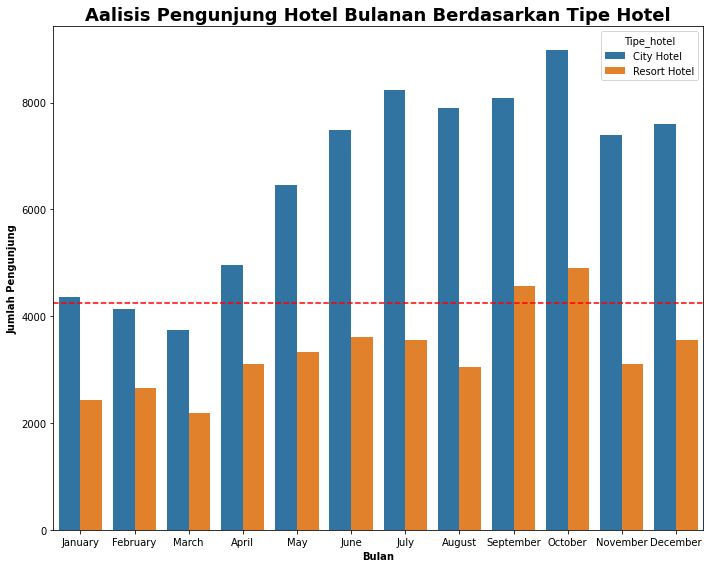

In [ ]:
x=df_hotels['Bulan']
y=df_hotels['Pengunjung']
fig, ax = plt.subplots(1, 1, figsize=(10,8))
sns.barplot(x=x, y = y, hue='Tipe_hotel', data=df_hotels)
plt.title("Aalisis Pengunjung Hotel Bulanan Berdasarkan Tipe Hotel", fontsize=18, fontweight='bold')
plt.xlabel("Bulan", fontsize=10, fontweight='bold')
plt.ylabel("Jumlah Pengunjung", fontsize=10, fontweight='bold')
plt.axhline(y= np.quantile(df_hotels['Pengunjung'],0.5), linestyle='--', color='red')
plt.tight_layout()
plt.show()

## taks 3

In [ ]:
df_stay = df[['hotel','stays_in_weekend_nights','stays_in_weekdays_nights','is_canceled']]
df_stay['duration']= df_stay['stays_in_weekdays_nights'] + df_stay['stays_in_weekend_nights']
df_stay['cancel'] = np.where(df_stay['is_canceled']== 0, 'No',  'Yes')
df_stay['time'] = np.where(df_stay.duration < 7, 'short', 
                            (np.where((df_stay.duration >= 7) & (df_stay.duration <= 14), 'mid_term',
                            (np.where((df_stay.duration >= 15) & (df_stay.duration <= 22), 'long', 'extend')))))
df_stay

,hotel,stays_in_weekend_nights,stays_in_weekdays_nights,is_canceled,duration,cancel,time
0,Resort Hotel,0,0,0,0,No,short
1,Resort Hotel,0,0,0,0,No,short
2,Resort Hotel,0,1,0,1,No,short
3,Resort Hotel,0,1,0,1,No,short
4,Resort Hotel,0,2,0,2,No,short
...,...,...,...,...,...,...,...
119385,City Hotel,2,5,0,7,No,mid_term
119386,City Hotel,2,5,0,7,No,mid_term
119387,City Hotel,2,5,0,7,No,mid_term
119388,City Hotel,2,5,0,7,No,mid_term


In [ ]:
df_agg = df_stay.groupby(['hotel', 'cancel', 'time'])['duration'].count().reset_index(name='num_duration')
df_pivot = df_agg.pivot_table(index=['hotel', 'time'], columns='cancel', values='num_duration').reset_index()
df_pivot['cancel_rate'] = round(df_pivot['No']*100.0/(df_pivot['No']+df_pivot['Yes']), 2)
df_pivot

cancel,hotel,time,No,Yes,cancel_rate
0,City Hotel,extend,10,37,21.28
1,City Hotel,long,34,81,29.57
2,City Hotel,mid_term,1779,1366,56.57
3,City Hotel,short,44405,31618,58.41
4,Resort Hotel,extend,55,46,54.46
5,Resort Hotel,long,97,79,55.11
6,Resort Hotel,mid_term,7089,3239,68.64
7,Resort Hotel,short,21697,7758,73.66


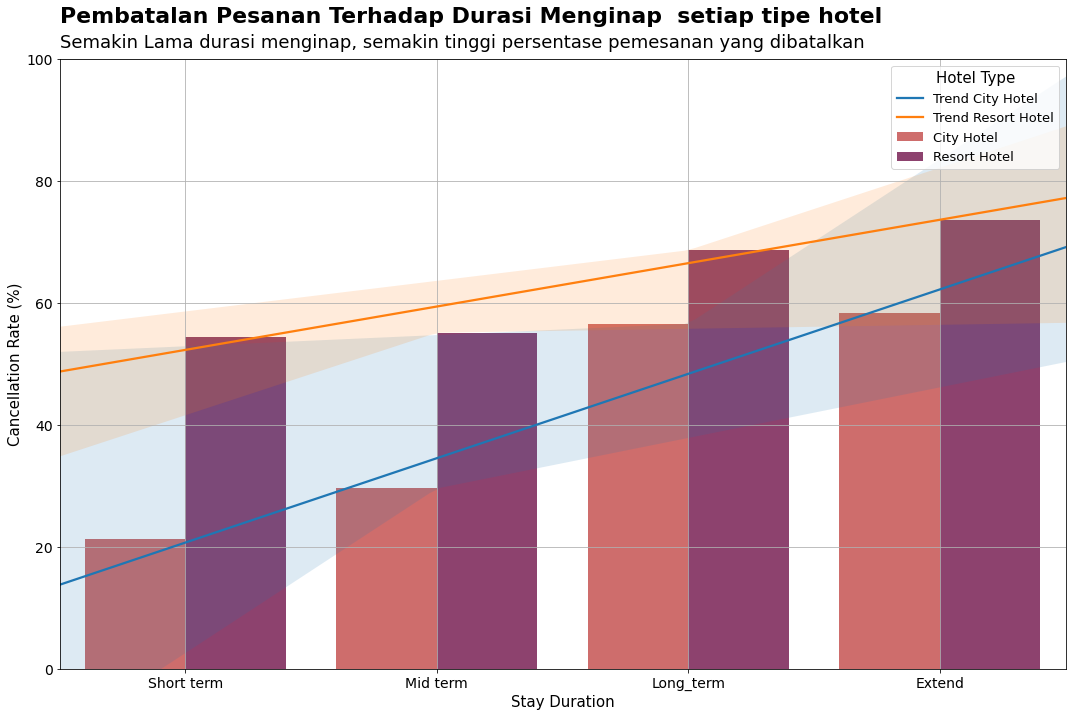

In [ ]:
# draw plot
plt.figure(figsize=(15,10))
ax = sns.barplot(x='time', y='cancel_rate', hue='hotel', data=df_pivot, palette="flare")
for c in ax.patches:
    c.set_zorder(0)
sns.regplot(x=np.arange(0, len(df_pivot[df_pivot['hotel'] == 'City Hotel'])), y='cancel_rate', 
            data=df_pivot[df_pivot['hotel'] == 'City Hotel'], scatter=False, label='Trend City Hotel', truncate=False)
sns.regplot(x=np.arange(0, len(df_pivot[df_pivot['hotel'] == 'City Hotel'])), y='cancel_rate', 
            data=df_pivot[df_pivot['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel', truncate=False)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13})
plt.xticks(range(0,4,1), labels=['Short term', 'Mid term', 'Long_term', 'Extend'])
plt.xlabel('Stay Duration', fontsize=15)
plt.ylabel('Cancellation Rate (%)', fontsize=15)
plt.ylim(0, 100)
plt.xlim(-0.5, 3.5)
plt.text(x=-0.5, y=106, s='Pembatalan Pesanan Terhadap Durasi Menginap  setiap tipe hotel ', fontsize=22, fontweight='bold')
plt.text(x=-0.5, y=102, s='Semakin Lama durasi menginap, semakin tinggi persentase pemesanan yang dibatalkan', fontsize=18)
plt.tight_layout()
plt.savefig('Durasi Menginap', dpi=200)

Dari visualisasi di samping kita bisa melihat bahwa semakin lama durasi menginap yang di pesan semakin besar pula kemungkinan di batalkan. Untuk mengatasi hal ini lebih baik berfokus pada penawaran short term karena lebih rendah pembatalan dan menerapkan kebijkan  biaya charge untuk setiap pembatalan.


## taks 4

In [ ]:
df['lead_time'].unique()

array([342, 737,   7,  13,  14,   0,   9,  85,  75,  23,  35,  68,  18,
        37,  12,  72, 127,  78,  48,  60,  77,  99, 118,  95,  96,  69,
        45,  40,  15,  36,  43,  70,  16, 107,  47, 113,  90,  50,  93,
        76,   3,   1,  10,   5,  17,  51,  71,  63,  62, 101,   2,  81,
       368, 364, 324,  79,  21, 109, 102,   4,  98,  92,  26,  73, 115,
        86,  52,  29,  30,  33,  32,   8, 100,  44,  80,  97,  64,  39,
        34,  27,  82,  94, 110, 111,  84,  66, 104,  28, 258, 112,  65,
        67,  55,  88,  54, 292,  83, 105, 280, 394,  24, 103, 366, 249,
        22,  91,  11, 108, 106,  31,  87,  41, 304, 117,  59,  53,  58,
       116,  42, 321,  38,  56,  49, 317,   6,  57,  19,  25, 315, 123,
        46,  89,  61, 312, 299, 130,  74, 298, 119,  20, 286, 136, 129,
       124, 327, 131, 460, 140, 114, 139, 122, 137, 126, 120, 128, 135,
       150, 143, 151, 132, 125, 157, 147, 138, 156, 164, 346, 159, 160,
       161, 333, 381, 149, 154, 297, 163, 314, 155, 323, 340, 35

In [ ]:

def group(x):
    if x['lead_time'] <= 30:
        group = 30
    elif x['lead_time'] >= 31 and x['lead_time'] <= 120:
        group = 120
    elif x['lead_time'] >= 121 and x['lead_time'] <= 210:
        group = 210
    elif x['lead_time'] >= 211 and x['lead_time'] <= 300:
        group = 300
    elif x['lead_time'] >= 301 and x['lead_time'] <= 360:
        group = 360
    else:
        group = '361+'
    return group

df['lead_time_group'] = df.apply(lambda x: group(x), axis=1)

df_time = df[['hotel','lead_time_group','is_canceled']]
df_time['is_canceled'] = np.where(df_stay['is_canceled']== 0, 'No',  'Yes')
df_time.head()

,hotel,lead_time_group,is_canceled
0,Resort Hotel,360,No
1,Resort Hotel,361+,No
2,Resort Hotel,30,No
3,Resort Hotel,30,No
4,Resort Hotel,30,No


In [ ]:
df_agg1 = df_time.groupby(['hotel', 'lead_time_group','is_canceled'])['hotel'].count().reset_index(name='num_bookings')
df_pivot1 = df_agg1.pivot_table(index=['hotel', 'lead_time_group'], columns='is_canceled', values='num_bookings').reset_index()
df_pivot1['cancel_rate'] = round(df_pivot1['Yes']*100.0/(df_pivot1['No']+df_pivot1['Yes']), 2)
df_pivot1

is_canceled,hotel,lead_time_group,No,Yes,cancel_rate
0,City Hotel,30,18163,5199,22.25
1,City Hotel,120,16458,11786,41.73
2,City Hotel,210,7317,7053,49.08
3,City Hotel,300,2767,4381,61.29
4,City Hotel,360,733,2608,78.06
5,City Hotel,361+,790,2075,72.43
6,Resort Hotel,30,13358,1986,12.94
7,Resort Hotel,120,7743,4000,34.06
8,Resort Hotel,210,4609,2686,36.82
9,Resort Hotel,300,2274,1723,43.11


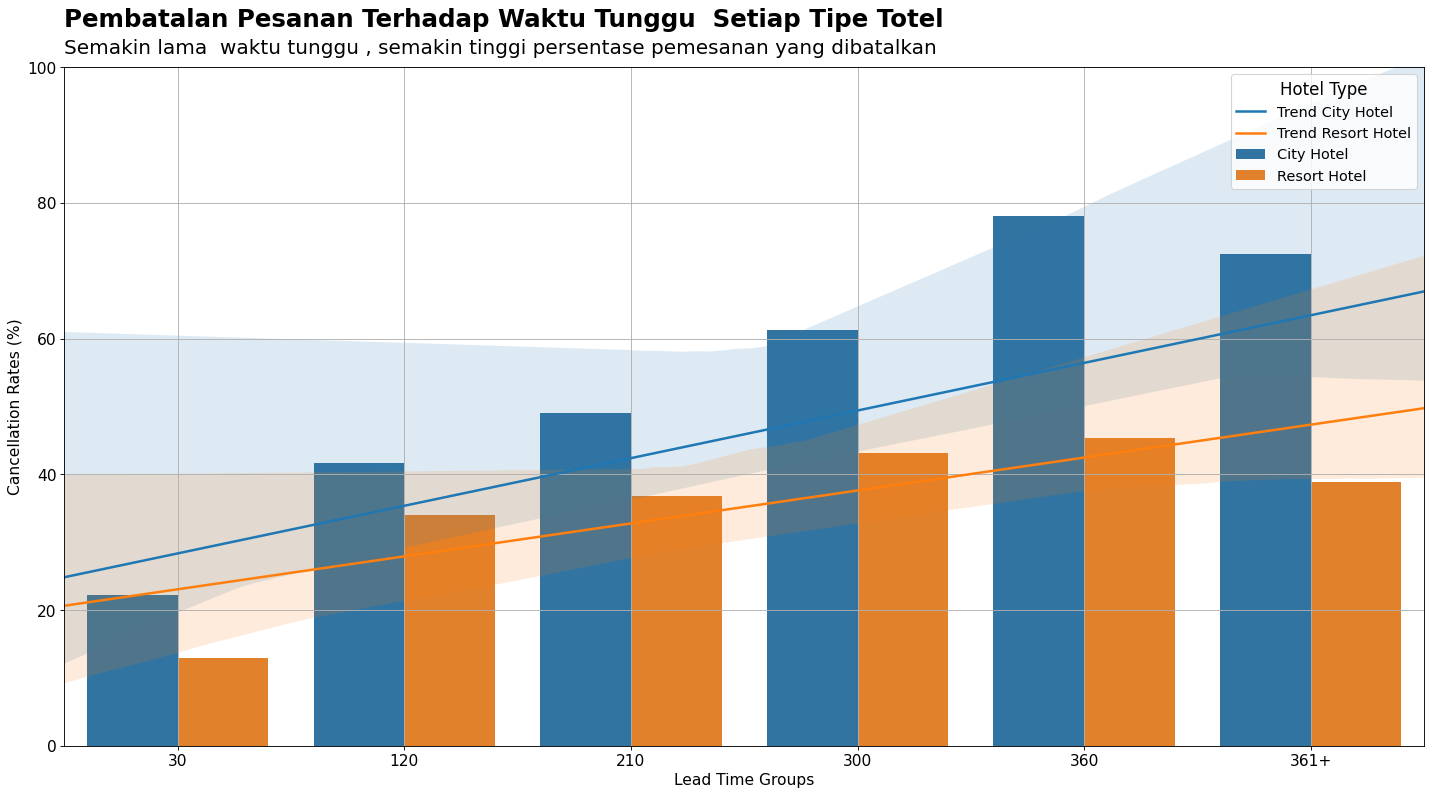

In [ ]:
fig, ax = plt.subplots(figsize=(18,10), facecolor='white', dpi= 80)
ax = sns.barplot(x='lead_time_group', y = 'cancel_rate', hue='hotel', data=df_pivot1)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid()
plt.ylim(0, 100)
plt.xlim(-0.5,5.5)
plt.text(x=-0.5, y=106, s='Pembatalan Pesanan Terhadap Waktu Tunggu  Setiap Tipe Totel ', fontsize=22, fontweight='bold')
plt.text(x=-0.5, y=102, s='Semakin lama  waktu tunggu , semakin tinggi persentase pemesanan yang dibatalkan', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)

sns.regplot(x=np.arange(0, len(df_pivot1[df_pivot1['hotel'] == 'City Hotel'])), y='cancel_rate', 
            data=df_pivot[df_pivot1['hotel'] == 'City Hotel'], scatter=False, label='Trend City Hotel', truncate=False)
sns.regplot(x=np.arange(0, len(df_pivot[df_pivot1['hotel'] == 'City Hotel'])), y='cancel_rate', 
            data=df_pivot1[df_pivot1['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel', truncate=False)
plt.xlabel('Lead Time Groups', fontsize=14) 
plt.ylabel('Cancellation Rates (%)', fontsize=14)
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13})
plt.tight_layout()
plt.show()

Berdsarkan grafik di atas dapat kila lihat bahwa semakin lama lead time semakin besar kemungkinan pesanan untuk di batalkan  pembatalan pemesanan terttinggi terjadi pada waktu tunggu 360 hari, city hotel memiliki presentase pembatalan tertinggi hampir mendekati 80% dan resort hotel hanya sekitar 40%. 
 
 pihak hotel mungkin dapat melakukan pembatasan lead time supaya memininalisir pemabatalan pesanan karena lama waktu lead time dan pemberian charge atau pemotongan refpund 30 persen dari harga hotel untuk pesanan yang di batalkan.